[View in Colaboratory](https://colab.research.google.com/github/redpanda-ai/epi_python/blob/master/loading_files_from_google_drive_into_colab.ipynb)

# How to load files from Google Drive into Colab

## First, connect to your Google Drive

With two lines of code, we can access the contents of a [Google Drive](https://drive.google.com).  Google Drive provides a free drive to anyone who signs up, and Google Colab makes it very easy to mount that drive and use it within a Google Colab notebook.

Within my drive, I made a special directory called "colab" and placed two files inside:

*   red_panda_banner.png
*   train.h5.zip


#### Figure 1: View of my drive from a browser window

![my_directory_in_google_drive](https://i.imgur.com/wfZ4GGj.png)

And then I mount it within my Colab Notebook **with the following python commands**:

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Second, verify that you have correctly mounted the Google Drive

Wow, only two lines of code!  But did it really work?

Let's take a quick look at the contents of the directory with python to see that it is correctly mounted:

drive/My Drive/colab/red_panda_banner.png
drive/My Drive/colab/train.h5.zip

Let's look at the image:


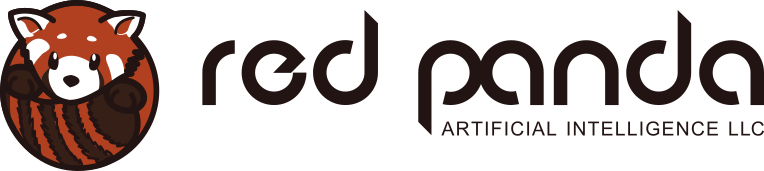

In [3]:
import glob
path = 'drive/My Drive/colab/'

def list_files(path):
  """This function just lists files in a directory path"""
  my_files = glob.glob(f"{path}*")
  for file in my_files:
    print(file)

# 1. Call a function to list all files in the directory path    
list_files(path)    
# 2. Load an image file with PIL Image and see it rendered in the notebook
from PIL import Image
print("\nLet's look at the image:")
x=Image.open(f"{path}red_panda_banner.png")

# 3.  Display the image, red_panda_banner.png, as a test to ensure that we have
# loaded the file from the mounted drive
x

## Third, lets make sure we can not only read from the directory, but that we can write to the directory

Our second file, [train.h5.zip](https://www.youtube.com/redirect?v=P1lgTATSVYA&event=video_description&redir_token=lwaoA4qKxHJfoKOfpUXh9ySjaGF8MTUzODYxNzM1NkAxNTM4NTMwOTU2&q=https%3A%2F%2Fwww.kaggle.com%2Fc%2Ftwo-sigma-financial-modeling%2Fdownloads%2Ftrain.h5.zip), contains the training data we need for [Siraj's Two Sigma Kaggle entry](https://www.youtube.com/watch?time_continue=1119&v=P1lgTATSVYA) , but we need to unzip it for use in our Colab notebook.

Now, let's extract the file and then re-list the files in the target directory:

In [4]:
import zipfile

with zipfile.ZipFile(f"{path}train.h5.zip") as my_zip:
  my_zip.extractall(path=path)
  
list_files(path)

drive/My Drive/colab/red_panda_banner.png
drive/My Drive/colab/train.h5.zip
drive/My Drive/colab/train.h5


## Finally, let's double-check that we've actually written the results to the mounted Google Drive

My Google Drive now looks like this!

![updated_google_drive_directory](https://i.imgur.com/jD6q7LU.png)